In [2]:

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from dataset_navigation import get_image_paths
from raw_utils import pack_raw
from raw_utils import unpack_raw
from post_processor import PostProcessor, get_gray_world_constants
from rawpy import rawpy
from tqdm import tqdm

In [20]:
def load_image(file_path, downscale_factor=1):
    raw = pack_raw(rawpy.imread(file_path).raw_image_visible, normalize=True)
    if downscale_factor > 1:
        raw = cv.resize(raw, (raw.shape[1] // downscale_factor, raw.shape[0] // downscale_factor), interpolation=cv.INTER_CUBIC)
    pp = PostProcessor(get_gray_world_constants(raw))
    processed = pp.postprocess(raw)
    return processed 

n_images = -1
image_paths = get_image_paths()
filtered_image_paths = image_paths['filter_long_exp']
filtered_image_paths = filtered_image_paths[:n_images] if n_images > 0 else filtered_image_paths
images = []
for i in tqdm(range(len(filtered_image_paths))):
    images.append(load_image(filtered_image_paths[i], downscale_factor=10))
    
    

100%|██████████| 237/237 [01:33<00:00,  2.53it/s]


Shape of images: (284, 428, 3)
float64
(284, 428, 3)
0.14997021641215227 1.0


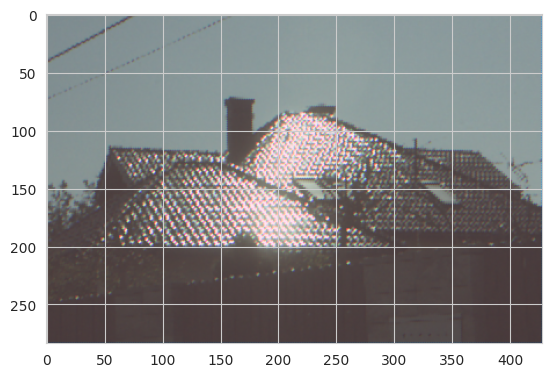

In [19]:
print("Shape of images:", images[0].shape)
print(images[0].dtype)
print(images[0].shape)
print(images[0].min(), images[0].max())
plt.imshow(images[0])
plt.show()

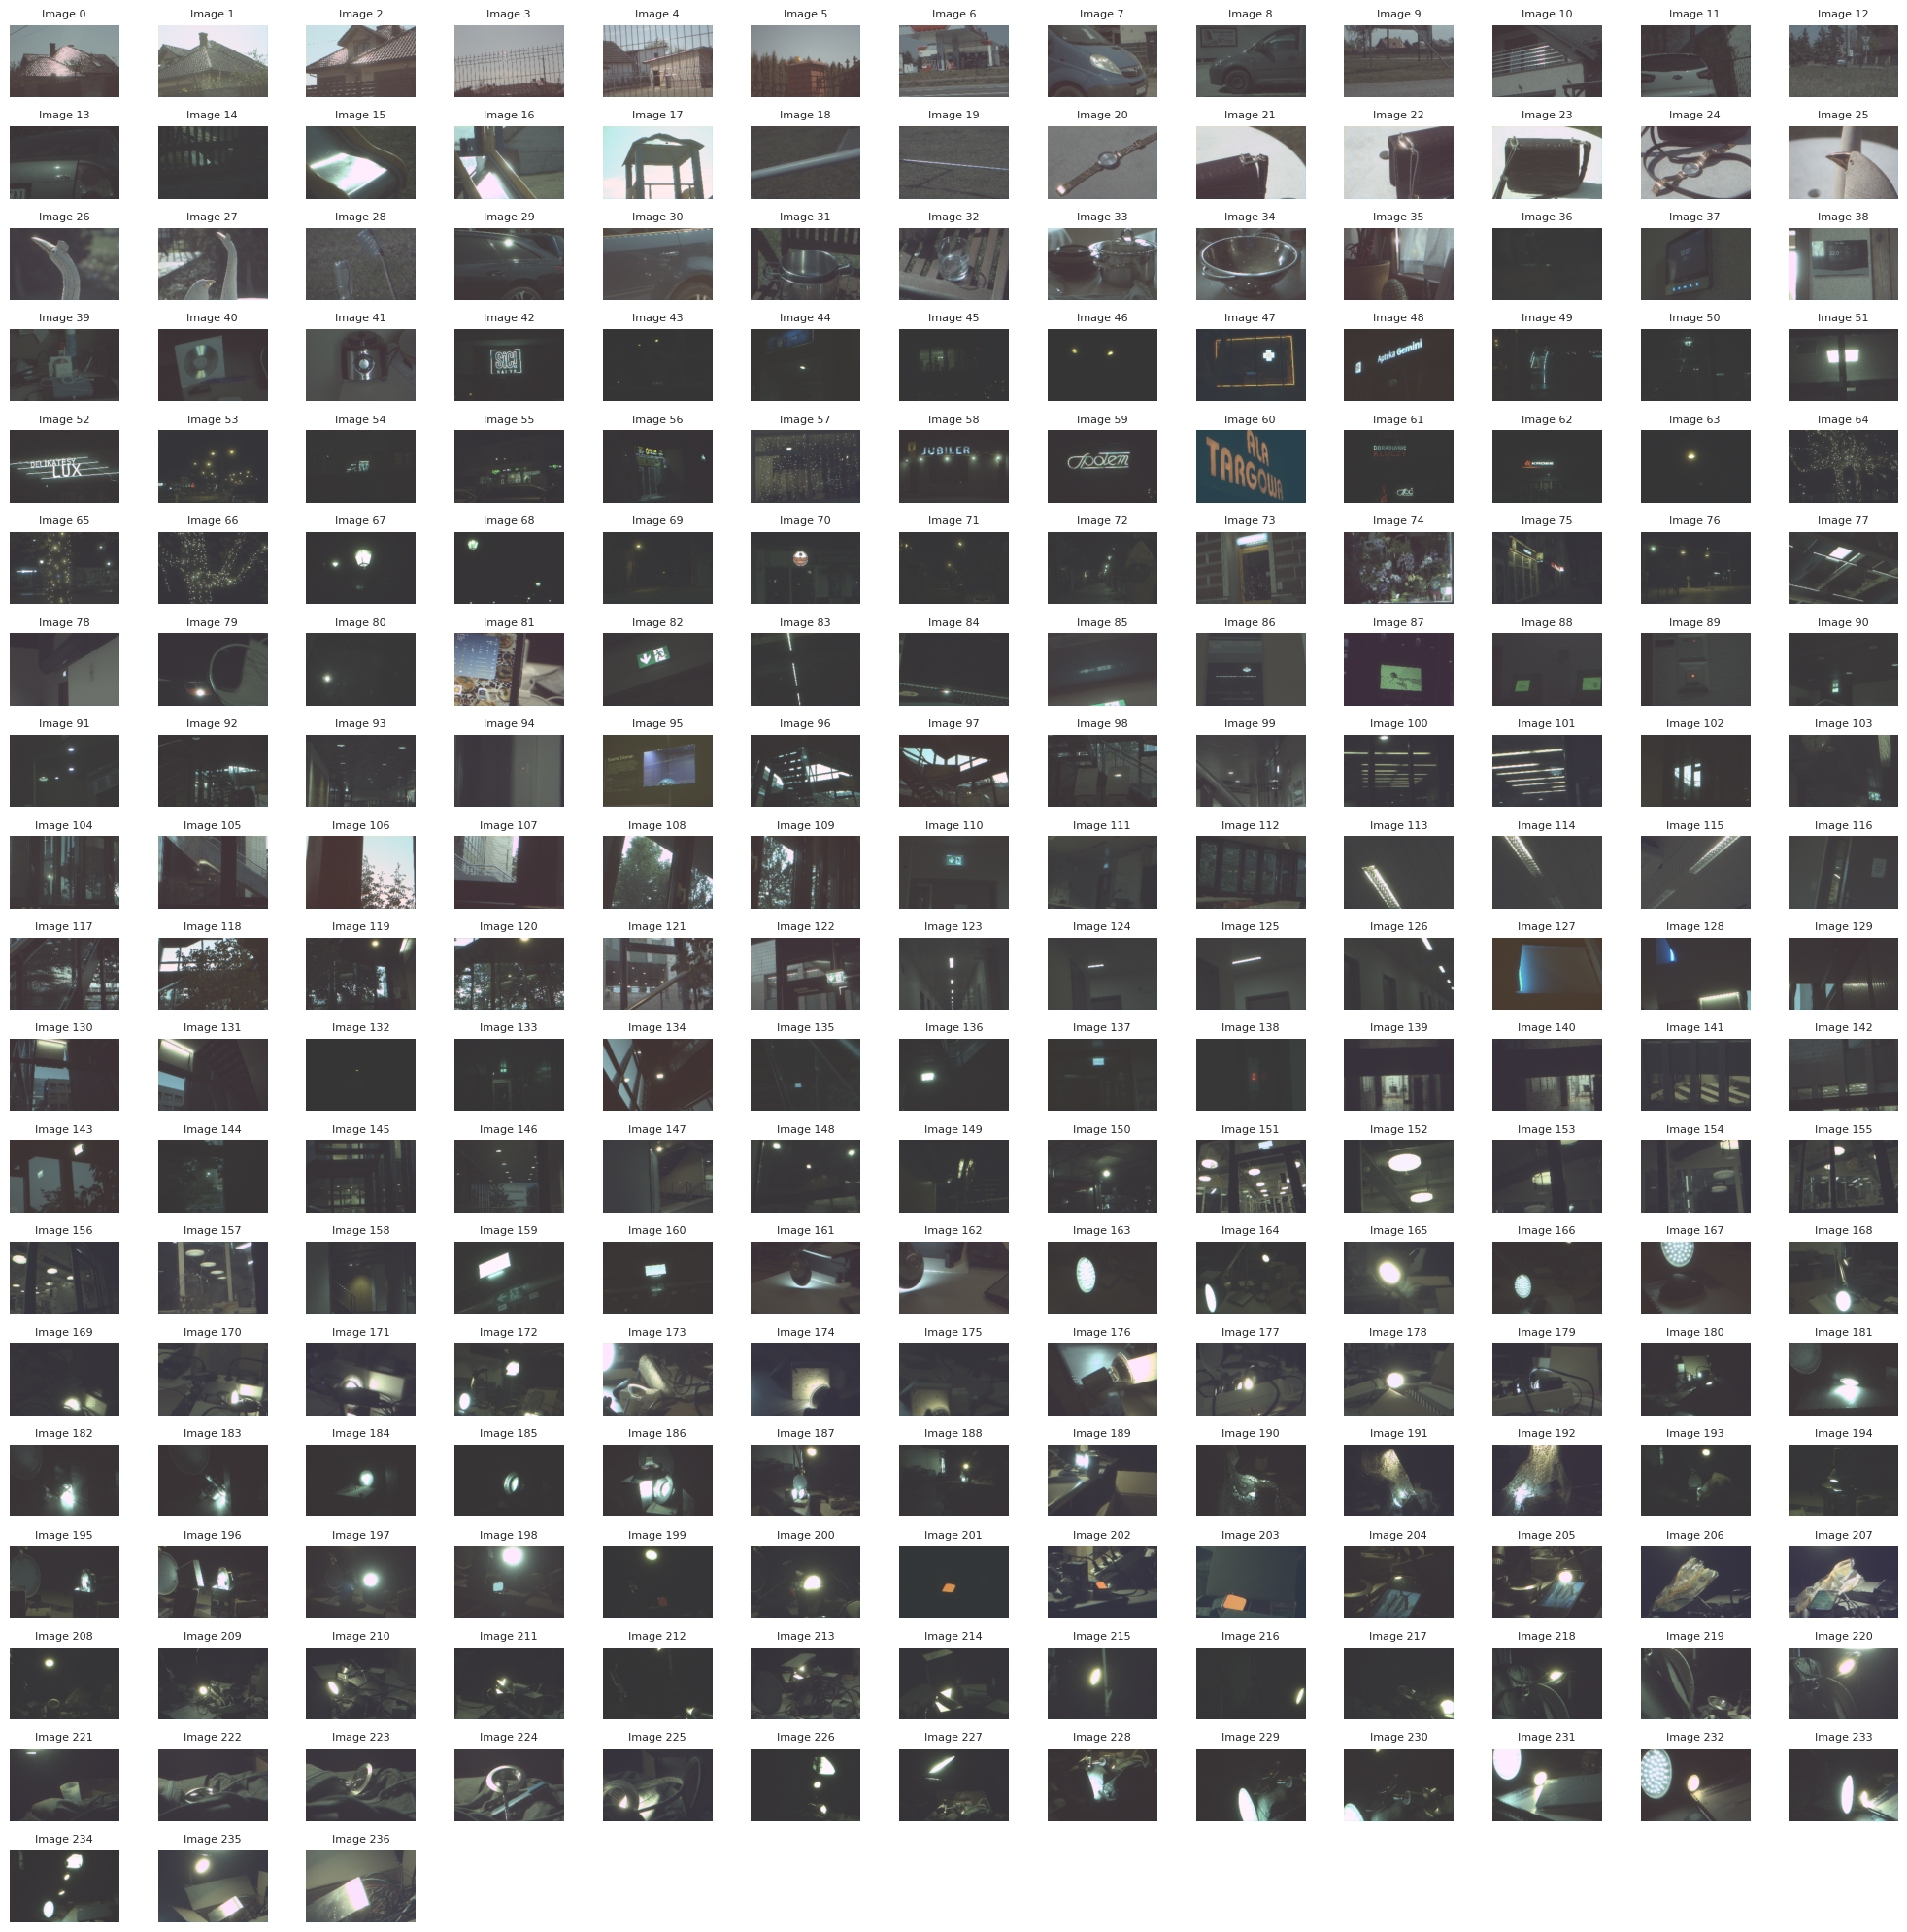

In [24]:
# Display the images
plt.figure(figsize=(20,20))
for i in range(len(images)):
    plt.subplot(19,13, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(f'Image {i}', fontsize=8)
plt.tight_layout()